In [1]:
import pandas_datareader as pdr
import pandas as pd

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='74991963523f55f29ef9c6f37b8d2ef924df5d19')

/tmp/ipython-input-2-2720725712.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='74991963523f55f29ef9c6f37b8d2ef924df5d19')


In [3]:
df.to_csv('AAPL.csv')

In [4]:
data = pd.read_csv('AAPL.csv')

In [5]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-07-20 00:00:00+00:00,393.43,394.00,384.250,385.6700,22397208,95.616643,95.755172,93.385596,93.730704,89588832,0.0,1.0
1,AAPL,2020-07-21 00:00:00+00:00,388.00,397.00,386.970,396.6900,25627347,94.296972,96.484273,94.046647,96.408932,102509388,0.0,1.0
2,AAPL,2020-07-22 00:00:00+00:00,389.09,391.90,386.410,386.7700,22250413,94.561878,95.244802,93.910549,93.998041,89001652,0.0,1.0
3,AAPL,2020-07-23 00:00:00+00:00,371.38,388.31,368.039,387.9935,49251108,90.257756,94.372312,89.445781,94.295392,197004432,0.0,1.0
4,AAPL,2020-07-24 00:00:00+00:00,370.46,371.88,356.580,363.9500,46359716,90.034165,90.379273,86.660861,88.452018,185438864,0.0,1.0


In [9]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,AAPL,2025-07-11 00:00:00+00:00,211.16,212.13,209.86,210.565,39765812,211.16,212.13,209.86,210.565,39765812,0.0,1.0
1251,AAPL,2025-07-14 00:00:00+00:00,208.62,210.91,207.54,209.925,38840111,208.62,210.91,207.54,209.925,38840111,0.0,1.0
1252,AAPL,2025-07-15 00:00:00+00:00,209.11,211.89,208.92,209.220,42296339,209.11,211.89,208.92,209.220,42296339,0.0,1.0
1253,AAPL,2025-07-16 00:00:00+00:00,210.16,212.40,208.64,210.295,47490532,210.16,212.40,208.64,210.295,47490532,0.0,1.0
1254,AAPL,2025-07-17 00:00:00+00:00,210.02,211.80,209.59,210.570,47838411,210.02,211.80,209.59,210.570,47838411,0.0,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1255 non-null   object 
 1   date         1255 non-null   object 
 2   close        1255 non-null   float64
 3   high         1255 non-null   float64
 4   low          1255 non-null   float64
 5   open         1255 non-null   float64
 6   volume       1255 non-null   int64  
 7   adjClose     1255 non-null   float64
 8   adjHigh      1255 non-null   float64
 9   adjLow       1255 non-null   float64
 10  adjOpen      1255 non-null   float64
 11  adjVolume    1255 non-null   int64  
 12  divCash      1255 non-null   float64
 13  splitFactor  1255 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.4+ KB


In [13]:
data1 = data['close']

In [14]:
data1.shape

(1255,)

In [16]:
data1

,close
0,393.43
1,388.00
2,389.09
3,371.38
4,370.46
...,...
1250,211.16
1251,208.62
1252,209.11
1253,210.16


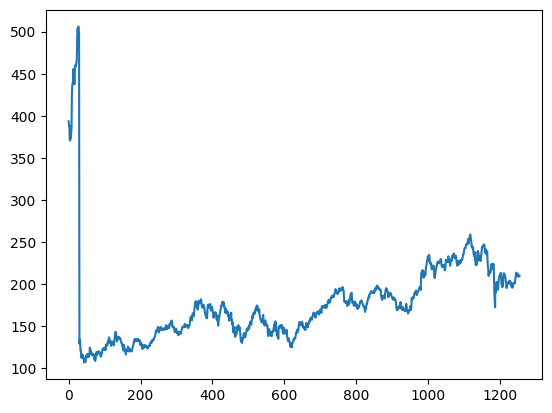

In [20]:
import matplotlib.pyplot as plt
plt.plot(data1)


In [21]:
 import numpy as np

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [27]:
print(data_scaled.shape)

(1255, 1)


In [28]:
data_scaled

array([[0.71782091],
       [0.70422041],
       [0.70695053],
       ...,
       [0.25615529],
       [0.25878522],
       [0.25843456]])

In [33]:
training_size = int(len(data_scaled)*0.65)
test_size = len(data_scaled) - training_size
train_data, test_data = data_scaled[0:training_size,:], data_scaled[training_size:len(data_scaled),:1]

In [34]:
training_size, test_size

(815, 440)

In [35]:
len(train_data), len(test_data)

(815, 440)

In [36]:
def creae_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
from datetime import time
time_step = 100
X_train, y_train = creae_dataset(train_data, time_step)
X_test, y_test = creae_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [39]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)